In [ ]:
import re
import numpy as np
import matplotlib.pyplot as plt

sentences = 'data.txt'

In [ ]:
file = open('data.txt','r')
s = ""

for i in file :
  s=s+i;
print(s)

Thanks to a hands-on guide introducing programming
 fundamentals alongside topics in computational 
 linguistics, plus comprehensive API documentation,
 uitable for linguists, engineers, students, 
 educators, researchers, and industry users alike. 
 NLTK is available for Windows, Mac OS X, and Linux. Best of all, NLTK is a free, open source, community-driven project.

NLTK has been called “a wonderful tool for teaching, and working in, computational linguistics using Python,” and “an amazing library to play with natural language.”


In [ ]:
sentences = s

In [ ]:
import nltk
nltk.download('punkt')
import re
import numpy as np

# execute the text here as :
file = open('data.txt','r')
s = ""

for i in file :
  s=s+i;
print(s)
dataset = nltk.sent_tokenize(s)
for i in range(len(dataset)):
	dataset[i] = dataset[i].lower()
	dataset[i] = re.sub(r'\W', ' ', dataset[i])
	dataset[i] = re.sub(r'\s+', ' ', dataset[i])

Thanks to a hands-on guide introducing programming
 fundamentals alongside topics in computational 
 linguistics, plus comprehensive API documentation,
 uitable for linguists, engineers, students, 
 educators, researchers, and industry users alike. 
 NLTK is available for Windows, Mac OS X, and Linux. Best of all, NLTK is a free, open source, community-driven project.

NLTK has been called “a wonderful tool for teaching, and working in, computational linguistics using Python,” and “an amazing library to play with natural language.”


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
word2count = {}
for data in dataset:
	words = nltk.word_tokenize(data)
	for word in words:
		if word not in word2count.keys():
			word2count[word] = 1
		else:
			word2count[word] += 1

In [ ]:
word2count

{'thanks': 1,
 'to': 2,
 'a': 3,
 'hands': 1,
 'on': 1,
 'guide': 1,
 'introducing': 1,
 'programming': 1,
 'fundamentals': 1,
 'alongside': 1,
 'topics': 1,
 'in': 2,
 'computational': 2,
 'linguistics': 2,
 'plus': 1,
 'comprehensive': 1,
 'api': 1,
 'documentation': 1,
 'uitable': 1,
 'for': 3,
 'linguists': 1,
 'engineers': 1,
 'students': 1,
 'educators': 1,
 'researchers': 1,
 'and': 4,
 'industry': 1,
 'users': 1,
 'alike': 1,
 'nltk': 3,
 'is': 2,
 'available': 1,
 'windows': 1,
 'mac': 1,
 'os': 1,
 'x': 1,
 'linux': 1,
 'best': 1,
 'of': 1,
 'all': 1,
 'free': 1,
 'open': 1,
 'source': 1,
 'community': 1,
 'driven': 1,
 'project': 1,
 'has': 1,
 'been': 1,
 'called': 1,
 'wonderful': 1,
 'tool': 1,
 'teaching': 1,
 'working': 1,
 'using': 1,
 'python': 1,
 'an': 1,
 'amazing': 1,
 'library': 1,
 'play': 1,
 'with': 1,
 'natural': 1,
 'language': 1}

In [ ]:
sentences = re.sub('[^A-Za-z0-9]+', ' ', sentences)

sentences = re.sub(r'(?:^| )\w(?:$| )', ' ', sentences).strip()

sentences = sentences.lower()
sentences

'thanks to hands on guide introducing programming fundamentals alongside topics in computational linguistics plus comprehensive api documentation uitable for linguists engineers students educators researchers and industry users alike nltk is available for windows mac os and linux best of all nltk is free open source community driven project nltk has been called wonderful tool for teaching and working in computational linguistics using python and an amazing library to play with natural language'

In [ ]:
words = sentences.split()
vocab = set(words)
vocab_size = len(vocab)
embed_dim = 10
context_size = 2
vocab

{'alike',
 'all',
 'alongside',
 'amazing',
 'an',
 'and',
 'api',
 'available',
 'been',
 'best',
 'called',
 'community',
 'comprehensive',
 'computational',
 'documentation',
 'driven',
 'educators',
 'engineers',
 'for',
 'free',
 'fundamentals',
 'guide',
 'hands',
 'has',
 'in',
 'industry',
 'introducing',
 'is',
 'language',
 'library',
 'linguistics',
 'linguists',
 'linux',
 'mac',
 'natural',
 'nltk',
 'of',
 'on',
 'open',
 'os',
 'play',
 'plus',
 'programming',
 'project',
 'python',
 'researchers',
 'source',
 'students',
 'teaching',
 'thanks',
 'to',
 'tool',
 'topics',
 'uitable',
 'users',
 'using',
 'windows',
 'with',
 'wonderful',
 'working'}

In [ ]:
def calculateBOW(vocab,words):
  tf_diz = dict.fromkeys(vocab,0)
  for word in words:
      tf_diz[word]=words.count(word)
  return tf_diz

In [ ]:
import pandas as pd
bow1 = calculateBOW(vocab,words)
df_bow = pd.DataFrame([bow1])
df_bow.head()

,industry,play,users,engineers,for,educators,nltk,mac,hands,programming,...,with,available,students,best,driven,language,fundamentals,free,wonderful,documentation
0,1,1,1,1,3,1,3,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [ ]:
word_to_ix = {word: i for i, word in enumerate(vocab)}
ix_to_word = {i: word for i, word in enumerate(vocab)}

In [ ]:
data = []
for i in range(2, len(words) - 2):
    context = [words[i - 2], words[i - 1], words[i + 1], words[i + 2]]
    target = words[i]
    data.append((context, target))
print(data[:5])

[(['thanks', 'to', 'on', 'guide'], 'hands'), (['to', 'hands', 'guide', 'introducing'], 'on'), (['hands', 'on', 'introducing', 'programming'], 'guide'), (['on', 'guide', 'programming', 'fundamentals'], 'introducing'), (['guide', 'introducing', 'fundamentals', 'alongside'], 'programming')]


In [ ]:
embeddings =  np.random.random_sample((vocab_size, embed_dim))

In [ ]:
def linear(m, theta):
    w = theta
    return m.dot(w)

In [ ]:
def log_softmax(x):
    e_x = np.exp(x - np.max(x))
    return np.log(e_x / e_x.sum())
def NLLLoss(logs, targets):
    out = logs[range(len(targets)), targets]
    return -out.sum()/len(out)

In [ ]:
def log_softmax_crossentropy_with_logits(logits,target):

    out = np.zeros_like(logits)
    out[np.arange(len(logits)),target] = 1
    
    softmax = np.exp(logits) / np.exp(logits).sum(axis=-1,keepdims=True)
    
    return (- out + softmax) / logits.shape[0]

In [ ]:
def forward(context_idxs, theta):
    m = embeddings[context_idxs].reshape(1, -1)
    n = linear(m, theta)
    o = log_softmax(n)
    
    return m, n, o

In [ ]:
def backward(preds, theta, target_idxs):
    m, n, o = preds
    
    dlog = log_softmax_crossentropy_with_logits(n, target_idxs)
    dw = m.T.dot(dlog)
    
    return dw

In [ ]:
def optimize(theta, grad, lr=0.03):
    theta -= grad * lr
    return theta

In [ ]:
theta = np.random.uniform(-1, 1, (2 * context_size * embed_dim, vocab_size))

In [ ]:
epoch_losses = {}

for epoch in range(80):

    losses =  []

    for context, target in data:
        context_idxs = np.array([word_to_ix[w] for w in context])
        preds = forward(context_idxs, theta)

        target_idxs = np.array([word_to_ix[target]])
        loss = NLLLoss(preds[-1], target_idxs)

        losses.append(loss)

        grad = backward(preds, theta, target_idxs)
        theta = optimize(theta, grad, lr=0.03)

        epoch_losses[epoch] = losses

Text(0, 0.5, 'Losses')

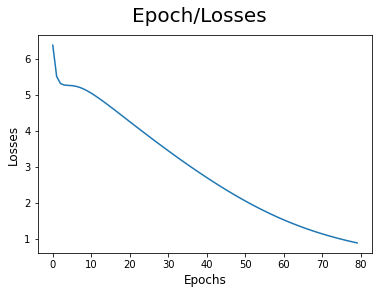

In [ ]:
ix = np.arange(0,80)

fig = plt.figure()
fig.suptitle('Epoch/Losses', fontsize=20)
plt.plot(ix,[epoch_losses[i][0] for i in ix])
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Losses', fontsize=12)

In [ ]:
def predict(words):
    context_idxs = np.array([word_to_ix[w] for w in words])
    preds = forward(context_idxs, theta)
    word = ix_to_word[np.argmax(preds[-1])]
    
    return word
predict(['to', 'hands', 'guide', 'introducing'])

'on'

In [ ]:
def accuracy():
    wrong = 0

    for context, target in data:
        if(predict(context) != target):
            wrong += 1
            
    return round((1 - (wrong / len(data))),3)
accuracy()

1.0